# Day 6: Sentiment Analysis with NLP – IMDB Top 1000 Dataset

In [3]:
# Import Required Libraries

import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [4]:
# Load the dataset
df = pd.read_csv('imdb_top_1000.csv')

In [5]:
# Display the first few rows
print("First 5 rows of the dataset:")
print(df.head())

First 5 rows of the dataset:
                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0 

In [6]:
# Check dataset info
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


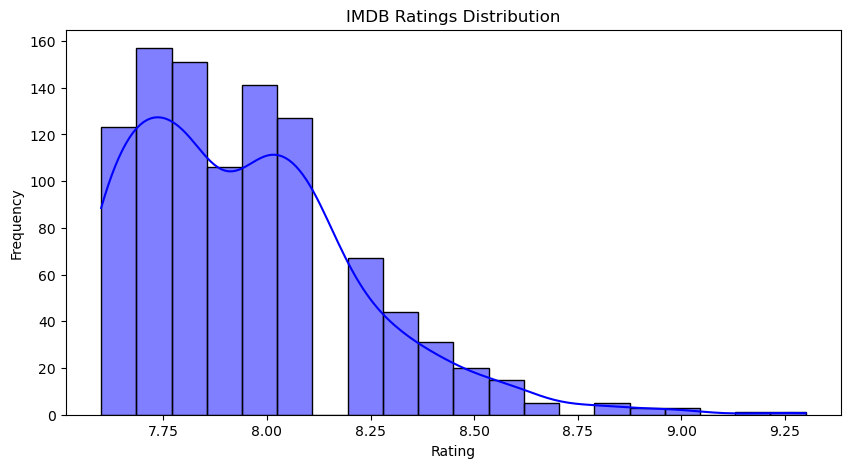

In [8]:
# Check distribution of IMDB ratings
plt.figure(figsize=(10, 5))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='blue')
plt.title('IMDB Ratings Distribution')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [11]:
# Define updated sentiment classification
def classify_sentiment(rating):
    if rating > 8.0:
        return "Positive"
    elif rating >= 7.0:
        return "Neutral"
    else:
        return "Negative"  # Likely unused if ratings start at 7

In [12]:
# Apply the updated classification logic
df['Sentiment'] = df['IMDB_Rating'].apply(classify_sentiment)

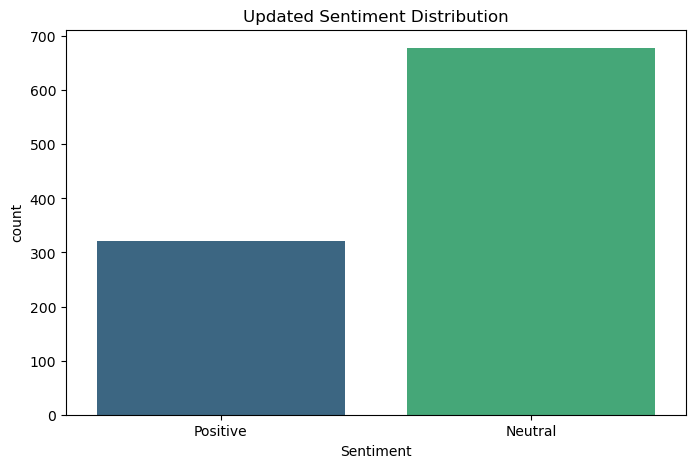

In [13]:
# Visualize updated sentiment distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Updated Sentiment Distribution')
plt.show()

In [14]:
# Select 'Overview' column as the text data for analysis
print("\nPreview of Text Data (Overview):")
print(df['Overview'].head())


Preview of Text Data (Overview):
0    Two imprisoned men bond over a number of years...
1    An organized crime dynasty's aging patriarch t...
2    When the menace known as the Joker wreaks havo...
3    The early life and career of Vito Corleone in ...
4    A jury holdout attempts to prevent a miscarria...
Name: Overview, dtype: object


In [15]:
# Drop rows with missing 'Overview'
df = df.dropna(subset=['Overview'])

In [17]:
# Clean text data: Remove punctuation, numbers, and convert to lowercase
def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    return text
df['Cleaned_Overview'] = df['Overview'].apply(clean_text)

In [18]:
# Preview cleaned text
print("\nCleaned Text Data:")
print(df[['Overview', 'Cleaned_Overview']].head())


Cleaned Text Data:
                                            Overview  \
0  Two imprisoned men bond over a number of years...   
1  An organized crime dynasty's aging patriarch t...   
2  When the menace known as the Joker wreaks havo...   
3  The early life and career of Vito Corleone in ...   
4  A jury holdout attempts to prevent a miscarria...   

                                    Cleaned_Overview  
0  two imprisoned men bond over a number of years...  
1  an organized crime dynastys aging patriarch tr...  
2  when the menace known as the joker wreaks havo...  
3  the early life and career of vito corleone in ...  
4  a jury holdout attempts to prevent a miscarria...  


In [20]:
# Convert text into numerical features using TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['Cleaned_Overview'])

# Target variable: Sentiment
y = df['Sentiment']

In [21]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [22]:
# Initialize Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [23]:
# Predict on test data
y_pred = model.predict(X_test)

In [24]:
# Evaluate model performance
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

     Neutral       0.68      1.00      0.81       136
    Positive       0.00      0.00      0.00        64

    accuracy                           0.68       200
   macro avg       0.34      0.50      0.40       200
weighted avg       0.46      0.68      0.55       200



C:\Users\swaro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\swaro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\swaro\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


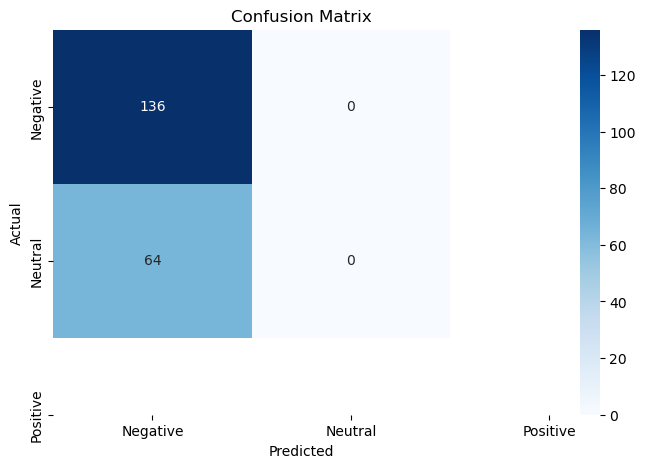

In [25]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")



Accuracy: 0.68


In [28]:
# Extract top 20 features (words) for binary classification
coefficients = model.coef_[0]  # Coefficients for the 'Positive' class in binary classification
feature_names = vectorizer.get_feature_names_out()

important_words = pd.DataFrame({
    'Word': feature_names,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False).head(20)

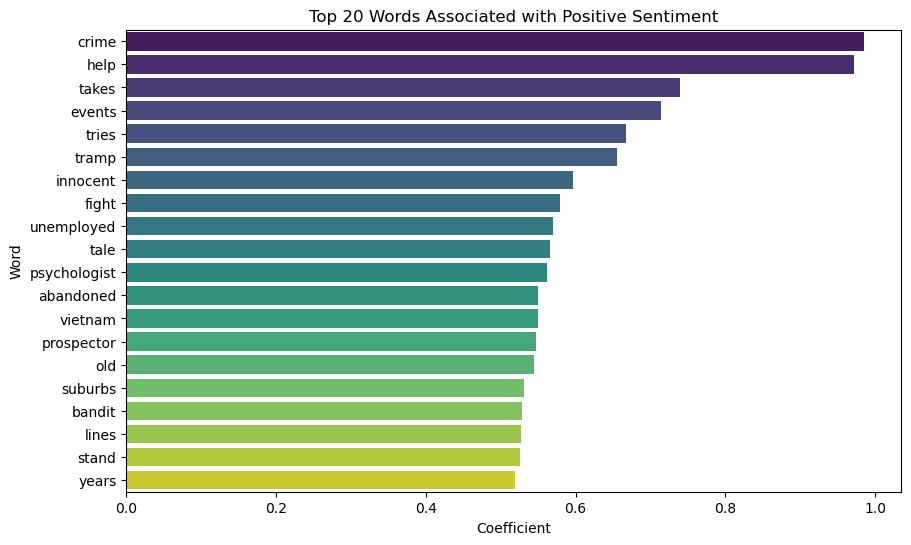

In [29]:
# Plot important words
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Word', data=important_words, palette='viridis')
plt.title('Top 20 Words Associated with Positive Sentiment')
plt.show()